# Dataset : 
The dataset has been attached to the assignment with two folders which consists of two objects i.e., dogs and wolves images. Please develop a CNN to identify the shapes as either dog or wolf. The task has been categorized into binary classification


In [45]:
import numpy as np 
import pandas as pd  
import os 
from pathlib import Path 
import glob
import zipfile 
import random 

import seaborn as sns 
import matplotlib.pyplot as plt 

import tensorflow as tf  
from tensorflow.keras import layers
from tensorflow.keras import Model   
from tensorflow.keras.optimizers import RMSprop


In [46]:
train_dir =r"C:\Users\uma21\OneDrive\Desktop\Sem-3\DL-MiniProject\Dataset-20231006T064832Z-001\Dataset\Train"
test_dir = r"C:\Users\uma21\OneDrive\Desktop\Sem-3\DL-MiniProject\Dataset-20231006T064832Z-001\Dataset\Valid"

In [47]:
from keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for normalization and grayscale conversion
train_datagen = ImageDataGenerator(rescale=1./255,preprocessing_function=tf.image.rgb_to_grayscale)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=20,class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(224,224),batch_size=20,class_mode='binary')

Found 940 images belonging to 2 classes.
Found 63 images belonging to 2 classes.


In [48]:
# building the model
model = Sequential()

In [49]:
model.add(Conv2D(64,(3,3),strides=(2,2),padding='same',activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(158,activation='relu'))
model.add(Dense(256, activation ='relu'))
model.add(Dense(128, activation ='relu'))
model.add(Dense(1,activation='sigmoid'))


In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 112, 112, 64)      1792      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 54, 54, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 27, 27, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 25, 25, 256)       295168    
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 12, 12, 256)      

In [32]:
from tensorflow.keras import optimizers
# Compiling the CNN
model.compile(loss='binary_crossentropy',optimizer='rmsprop', metrics=['accuracy'])

In [33]:
history = model.fit_generator(train_generator,steps_per_epoch=train_generator.samples//20,
                              epochs=15,validation_data=test_generator,validation_steps=test_generator.samples//20)

Epoch 1/15


C:\Users\uma21\AppData\Local\Temp\ipykernel_28840\2456257422.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,steps_per_epoch=train_generator.samples//20,


47/47 [==============================] - 18s 361ms/step - loss: 0.7015 - accuracy: 0.4936 - val_loss: 0.6909 - val_accuracy: 0.6333
Epoch 2/15
47/47 [==============================] - 28s 597ms/step - loss: 0.6986 - accuracy: 0.5181 - val_loss: 0.6969 - val_accuracy: 0.3667
Epoch 3/15
47/47 [==============================] - 28s 587ms/step - loss: 0.6941 - accuracy: 0.5128 - val_loss: 0.6859 - val_accuracy: 0.6500
Epoch 4/15
47/47 [==============================] - 26s 559ms/step - loss: 0.6972 - accuracy: 0.5149 - val_loss: 0.6996 - val_accuracy: 0.3667
Epoch 5/15
47/47 [==============================] - 27s 566ms/step - loss: 0.6891 - accuracy: 0.5574 - val_loss: 0.8583 - val_accuracy: 0.4167
Epoch 6/15
47/47 [==============================] - 31s 653ms/step - loss: 0.6787 - accuracy: 0.6043 - val_loss: 0.6525 - val_accuracy: 0.7000
Epoch 7/15
47/47 [==============================] - 27s 571ms/step - loss: 0.6287 - accuracy: 0.6436 - val_loss: 0.6421 - val_accuracy: 0.6833
Epoch 8/15

Text(0.5, 1.0, 'Training and validation loss')

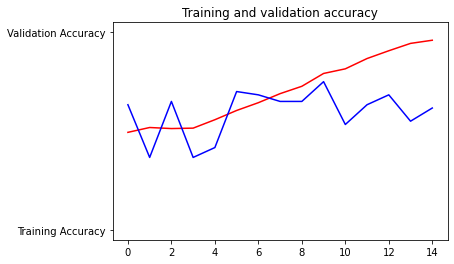

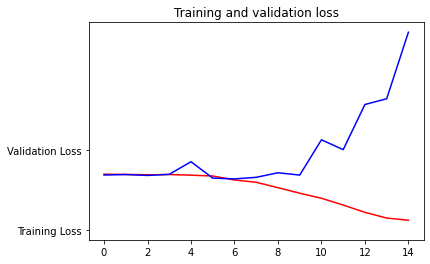

In [41]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")

plt.title('Training and validation loss')

In [42]:
model.save('my_model.h5')
new_model = tf.keras.models.load_model('./my_model.h5')

# Show the model architecture
new_model.summary()

C:\Users\uma21\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 112, 112, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 54, 54, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 27, 27, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 25, 25, 256)       295168    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 12, 12, 256)      

# 2.1 Print shape of the data and understand how many images of different classes exist in this dataset. Visualize some images using matplotlib.Convert the RGB Image to Grayscale ( For easier computation) . Normalize the data so that data is in range 0-1.Reshape train and test images into one dimensional vector

In [51]:
# Print the shape of the data
print("Shape of Image Data:", train_generator.image_shape)
print("Number of Classes:", train_generator.num_classes)

Shape of Image Data: (224, 224, 3)
Number of Classes: 2


In [52]:
# Print the number of images in each class
class_counts = train_generator.classes
unique_classes = set(class_counts)
for cls in unique_classes:
    print(f"Number of images in class {cls}: {class_counts.tolist().count(cls)}")

Number of images in class 0: 470
Number of images in class 1: 470


In [53]:
# Visualize images
def visualize_images(generator, num_images=5):
    images, labels = next(generator)
    class_labels = ['Dog' if label == 0 else 'Wolf' for label in labels]

    plt.figure(figsize=(12, 8))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.title(class_labels[i])
        plt.axis('off')
    plt.show()

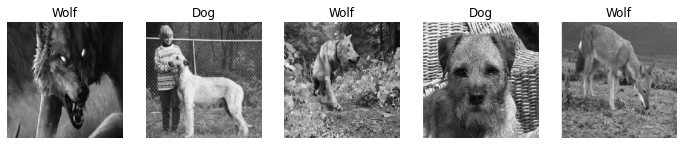

In [37]:
# Visualize training images
visualize_images(train_generator)

# 2.2 Construct the Deep Neural Network to classify the 2 classes of images available in the dataset. 
Compile and fit the model (No restrictions on CNN architecture. Feel free to explore and optimize.) Compute the performance accuracy of the model created. 


1/1 [==============================] - 0s 28ms/step
Model prediction = wolf


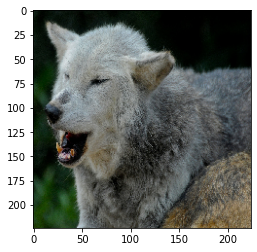

In [56]:
test_image = image.load_img(r"C:\Users\uma21\OneDrive\Desktop\Sem-3\DL-MiniProject\Dataset-20231006T064832Z-001\Dataset\Valid\wolves\Img-4479.jpg", target_size = (224, 224))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
if result[0][0] == 1:
    prediction = 'dog'
    print('dog')
else:
    prediction = 'wolf'
print(f"Model prediction = {prediction}")